In [1]:
%config InlineBackend.figure_format = 'retina'
import pandas as pd
import os

# Benchmarking the System Performance

In [2]:
run_id = 'Ford_2Predictors_Horizon5'

In [ ]:
os.mkdir(run_id)

In [ ]:
dir_ = './' + run_id + '/'

This Jupyter notebook serves to benchmark the performance of the prototype system.

### Loading and importing the system

In [3]:
%run ../tools/dataloader.py
%run ../system/activate.py

### Loading and importing financial data to forecast and to benchmark the system on

In [4]:
predict = DataLoader('BP', '2018-02-01', '2018-05-01')
predict = predict.get_adjclose()

In [5]:
predict_req, real = data_prep(predict, 20, 30) # dividing data into predictor input and real data

### Individual predictor forecasts

In [6]:
individual_predictors_forecasts = individual_predictors_pretrained_BP_30_5(predict_req, 30)

### System disagreement between individual predictor forecasts

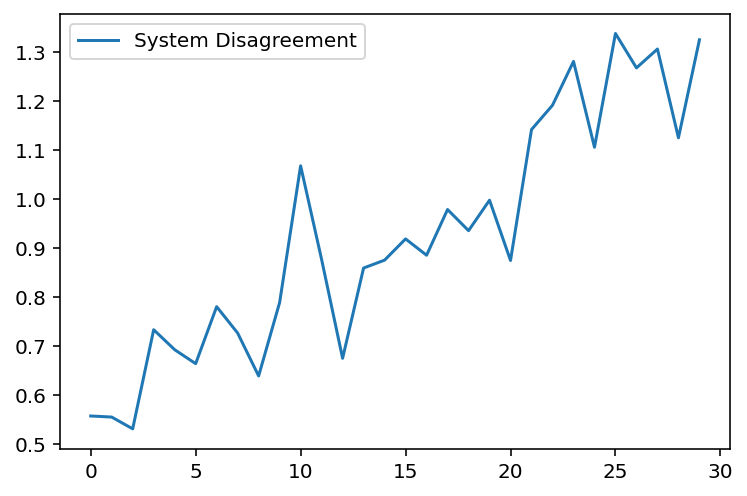

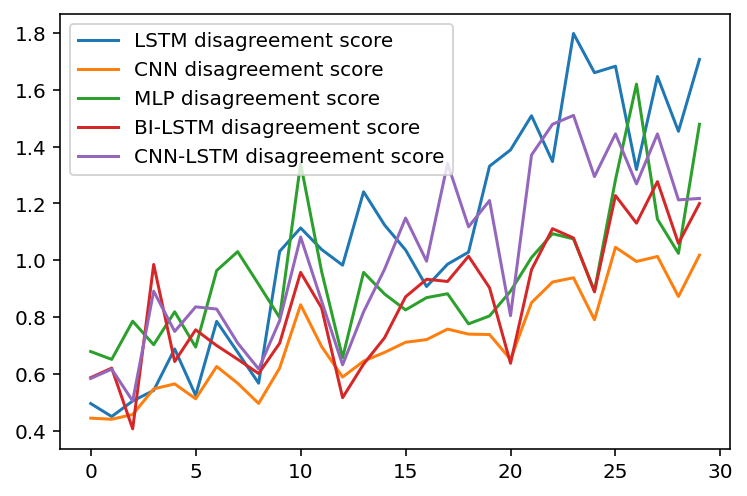

In [7]:
system_disagreement(individual_predictors_forecasts)

### Building consensus forecast values

In [8]:
consensus_forecasts = consensus(individual_predictors_forecasts, real)

In [9]:
all_forecasts = combined_frame(individual_predictors_forecasts, consensus_forecasts, real)

In [10]:
summary = all_stats_frame(all_forecasts, individual_predictors_forecasts) # combining individual predictor forecasts, consensus forecasts and disagreement scores
summary

,Average,NoMemory,Memory,Focus,Anchor,Correcting,Correcting Memory,Real Value,LSTM,CNN,MLP,BI-LSTM,CNN-LSTM,System Disagreement,LSTM disagreement score,CNN disagreement score,MLP disagreement score,BI-LSTM disagreement score,CNN-LSTM disagreement score
Date,,,,,,,,,,,,,,,,,,,
2018-03-02,32.057995,32.057995,32.057995,32.057995,32.523025,32.057995,32.057995,31.549549,31.623466,31.880047,32.736618,31.471310,32.578533,0.557709,0.495391,0.444075,0.678623,0.586685,0.583772
2018-03-05,32.065960,31.953417,32.009688,31.729818,31.986536,31.557295,31.811627,31.924553,31.729818,31.777794,32.716793,31.445732,32.659660,0.555514,0.449776,0.440181,0.650834,0.620227,0.616554
2018-03-06,32.022451,31.957288,31.967768,31.597425,32.030640,31.882846,31.807039,32.242489,31.517956,31.597425,32.807880,31.849337,32.339657,0.531533,0.504495,0.456813,0.785429,0.406431,0.504495
2018-03-07,32.012259,32.043612,31.972258,32.903393,32.150193,32.232560,31.904189,32.046844,31.784128,31.757584,32.589111,31.027081,32.903393,0.733464,0.541568,0.546877,0.702565,0.985179,0.891133
2018-03-08,31.812527,31.797720,31.773543,31.124746,31.774269,31.848728,31.733468,32.169121,31.124746,31.592314,32.631039,31.198761,32.515774,0.692736,0.687780,0.564661,0.818512,0.643372,0.749353
2018-03-09,31.950656,32.004453,31.932180,32.786556,32.035747,32.310114,31.944751,32.332169,31.580156,31.640572,32.550377,31.195620,32.786556,0.664335,0.524314,0.512231,0.694193,0.755037,0.835900
2018-03-12,31.626331,31.700479,31.614635,32.589863,31.746764,32.002638,31.673673,32.487061,30.841606,31.352814,32.589863,30.983175,32.364197,0.780406,0.784725,0.625856,0.963532,0.699783,0.828132
2018-03-13,31.628548,31.747339,31.634263,32.658768,31.796463,32.490786,31.778594,32.242489,30.952255,31.415283,32.658768,30.993832,32.122601,0.726687,0.676292,0.567056,1.030220,0.651347,0.708520
2018-03-14,31.546650,31.622090,31.559809,31.965233,31.623198,32.160704,31.748977,31.688131,31.002180,31.358593,32.461731,30.945511,31.965233,0.639279,0.567137,0.495855,0.915081,0.601139,0.617183


In [11]:
summary.to_csv(dir_ + run_id + '_Forecast_Summary.csv')

NameError: name 'dir_' is not defined

### Absolute error analysis of individual predictors and consensus forecasts

In [ ]:
prediction_error = absolute_error_analytics(individual_predictors_forecasts, consensus_forecasts, real)
prediction_error

In [ ]:
prediction_error.to_csv(dir_ + run_id + '_Prediction_Errors.csv')

### Correlation matrix of individual predictor and consensus forecast absolute errors

In [ ]:
correlation_ = correlation(prediction_error, True)
correlation_

In [ ]:
correlation_.to_csv(dir_ + run_id + '_Error_Correlation.csv')

### MSE,  MSE log and MAE scores

In [ ]:
mse = mse_score(all_forecasts, True)
mse

In [ ]:
mse.to_csv(dir_ + run_id + '_MSE_score.csv')

In [ ]:
mse_log = mse_log_score(all_forecasts, True)
mse_log

In [ ]:
mse_log.to_csv(dir_ + run_id + '_MSE_log_score.csv')

,Algorithms,MAE
0,Average,1.635736
1,NoMemory,1.558133
2,Memory,1.594873
3,Focus,1.128684
4,Anchor,1.366685
5,Correcting,0.399358
6,Correcting Memory,1.197028
7,LSTM,2.660135
8,CNN,1.705221
9,MLP,1.246561


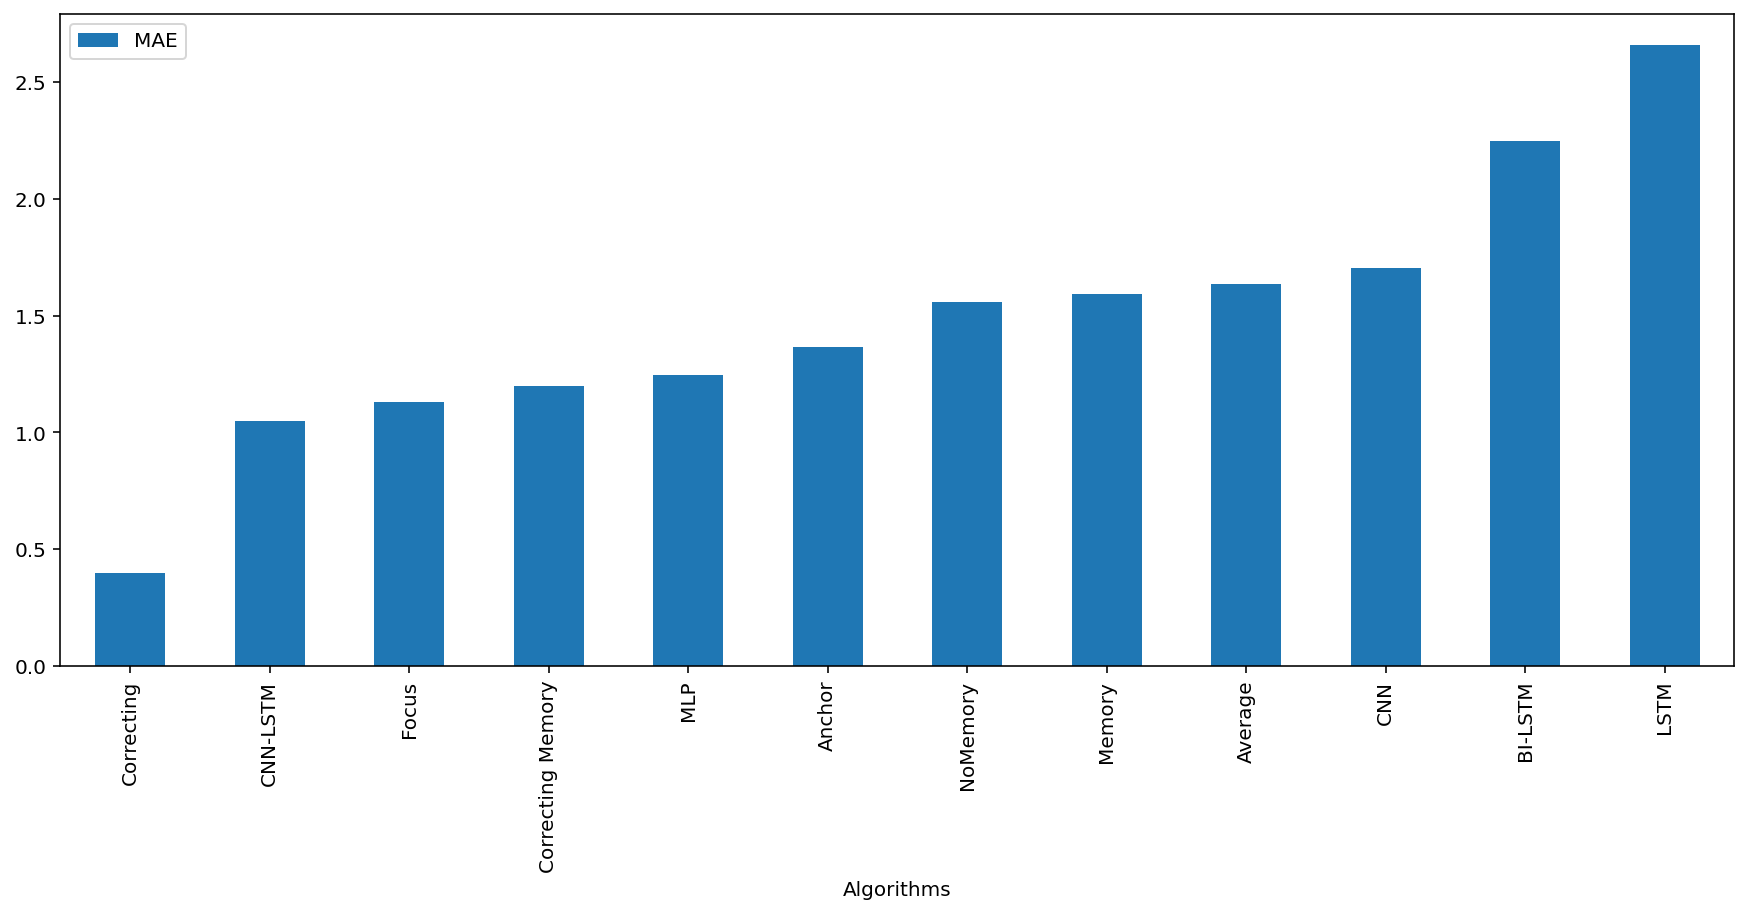

In [12]:
mae = mae_score(all_forecasts, True)
mae

In [ ]:
mae.to_csv(dir_ + run_id + '_MAE_score.csv')

### Performance plotting of all forecasting algorithms

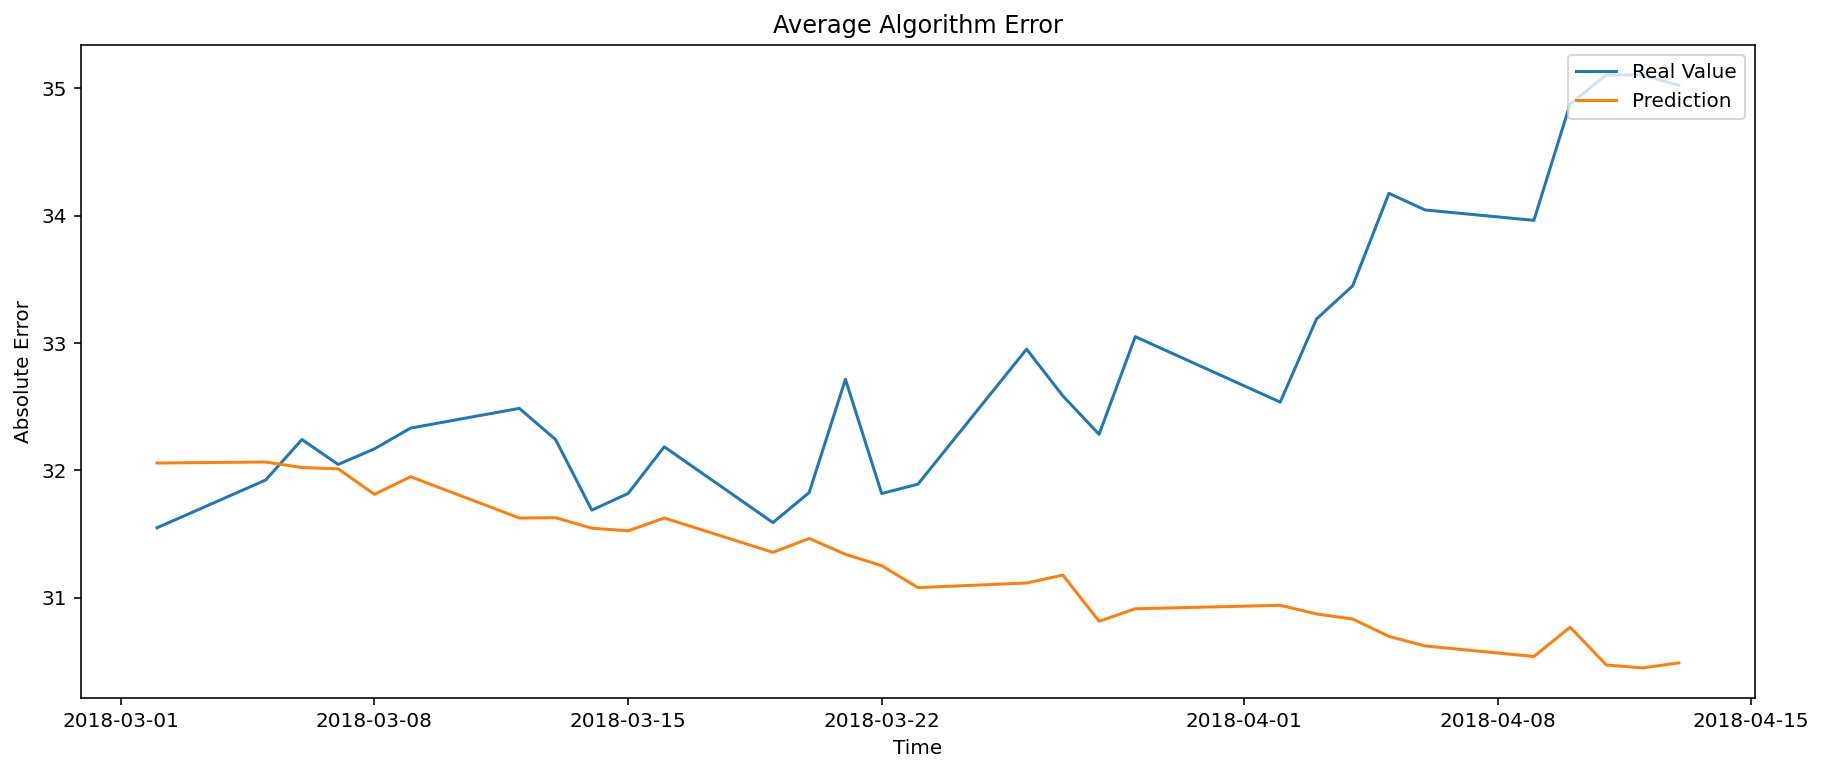

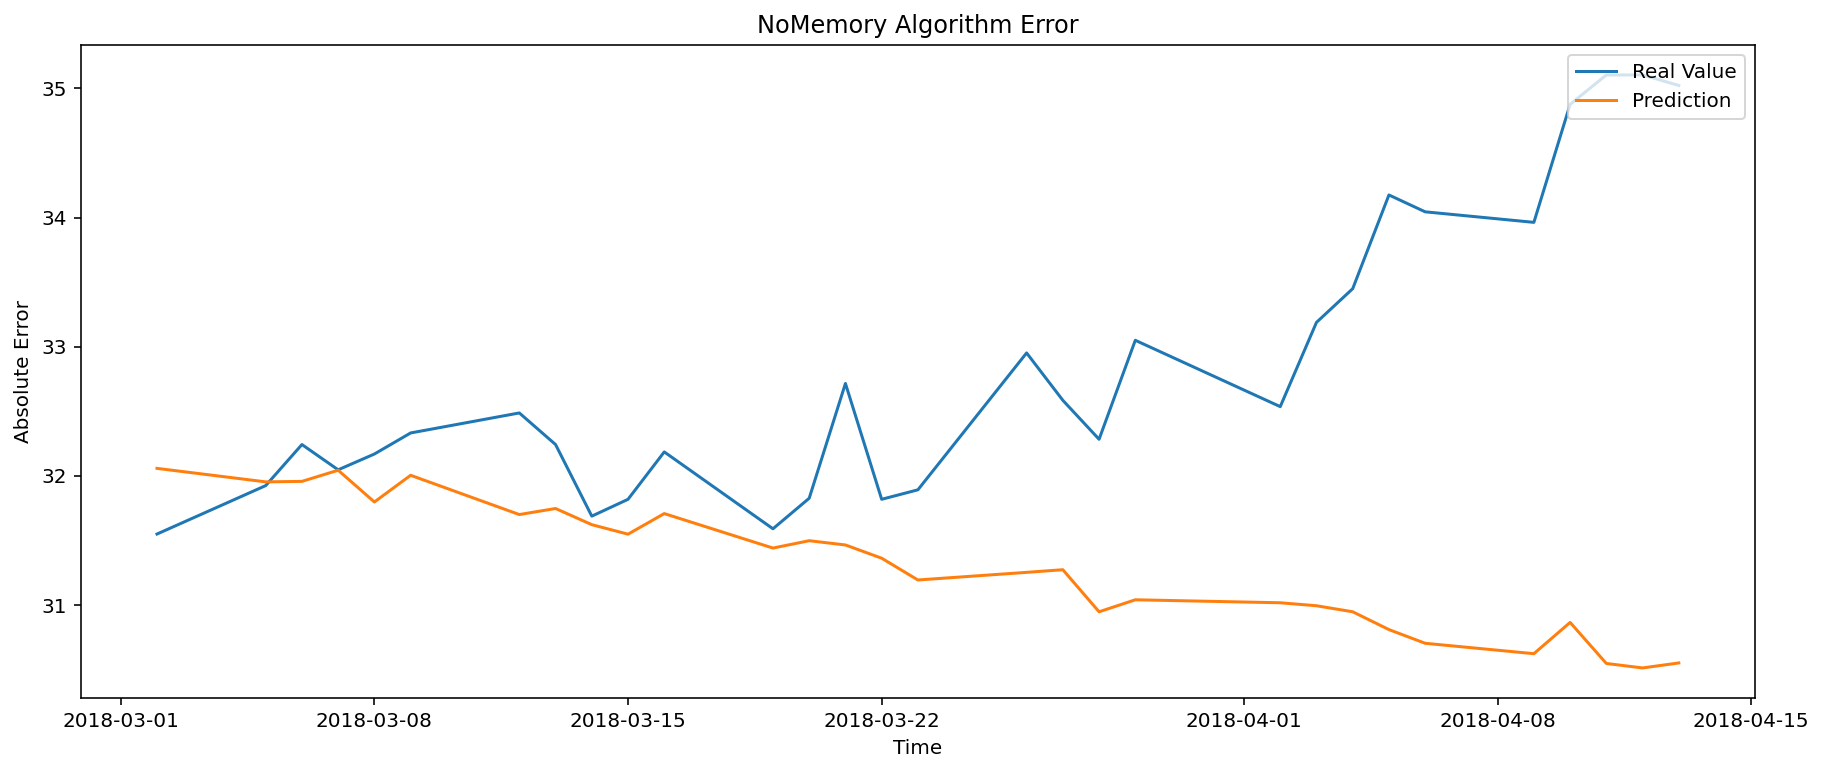

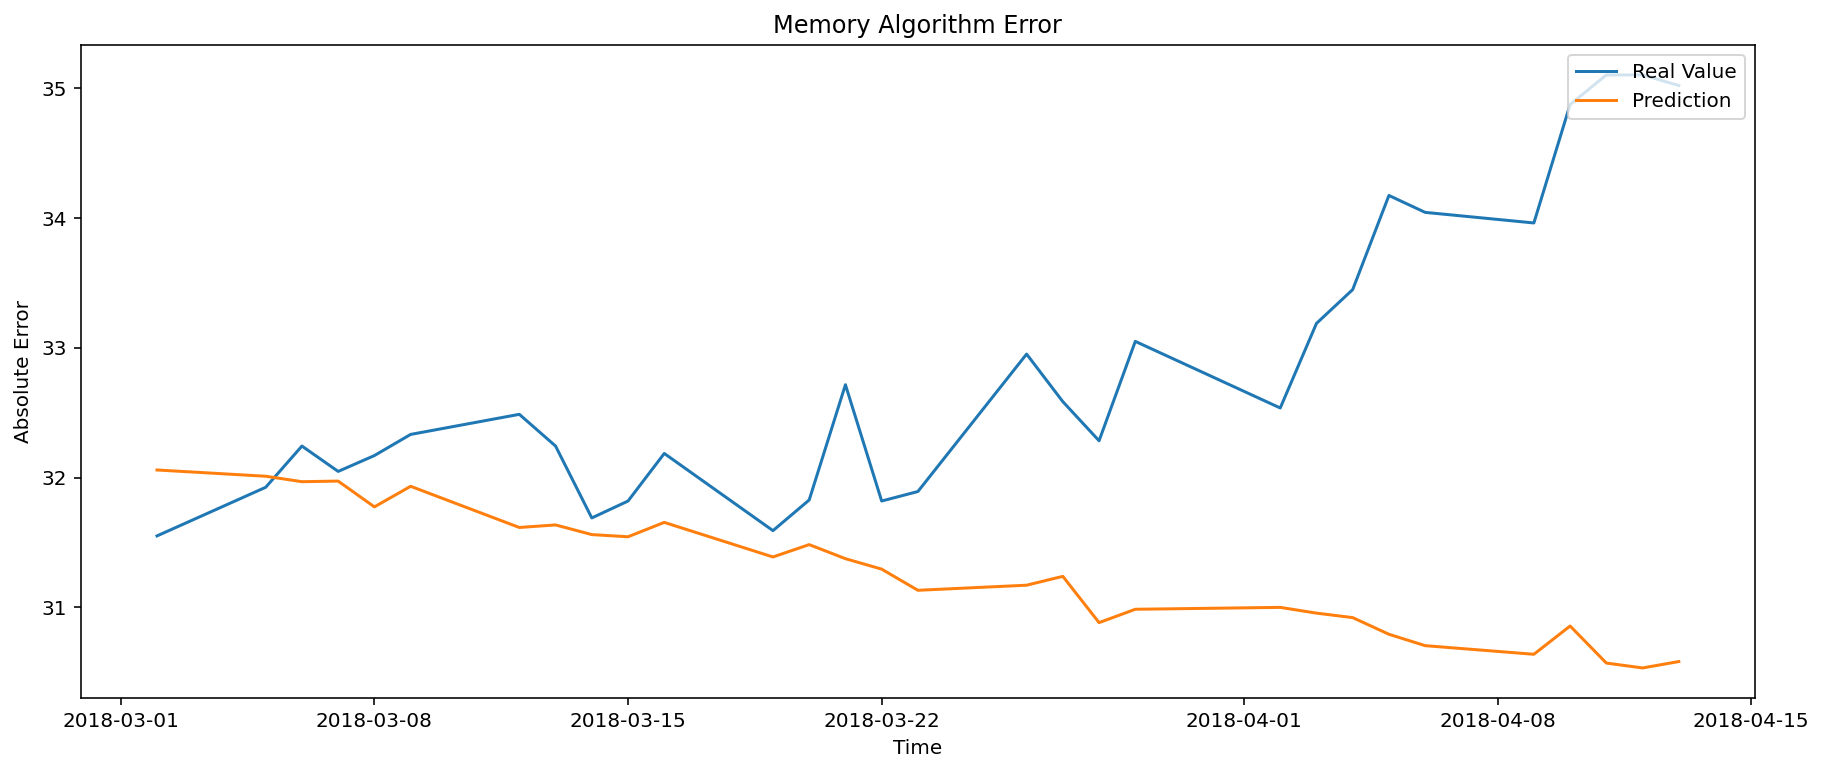

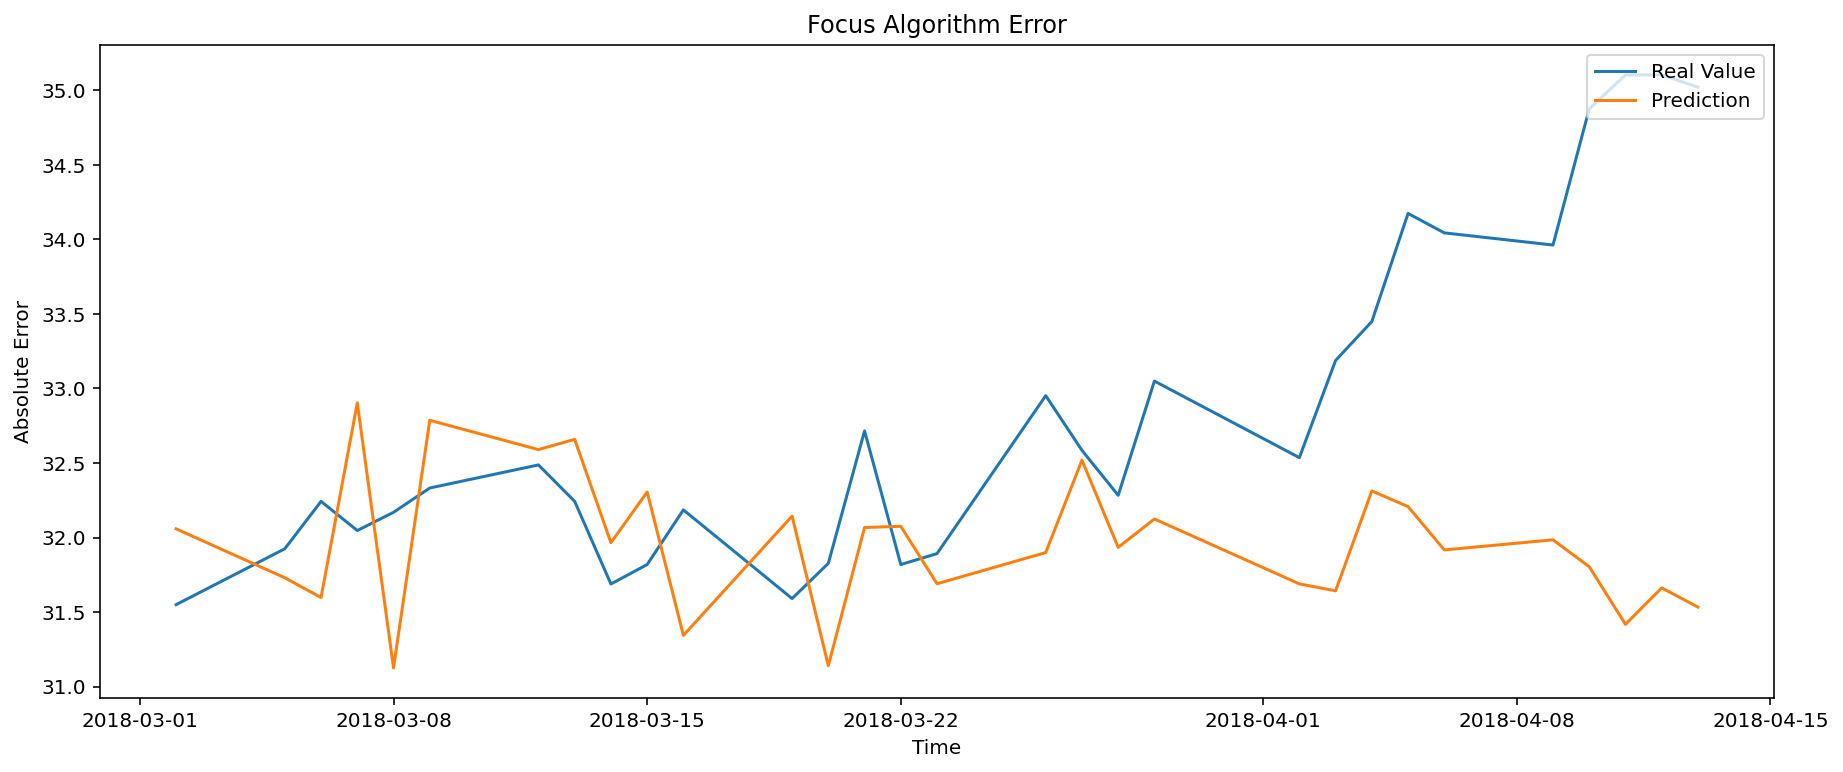

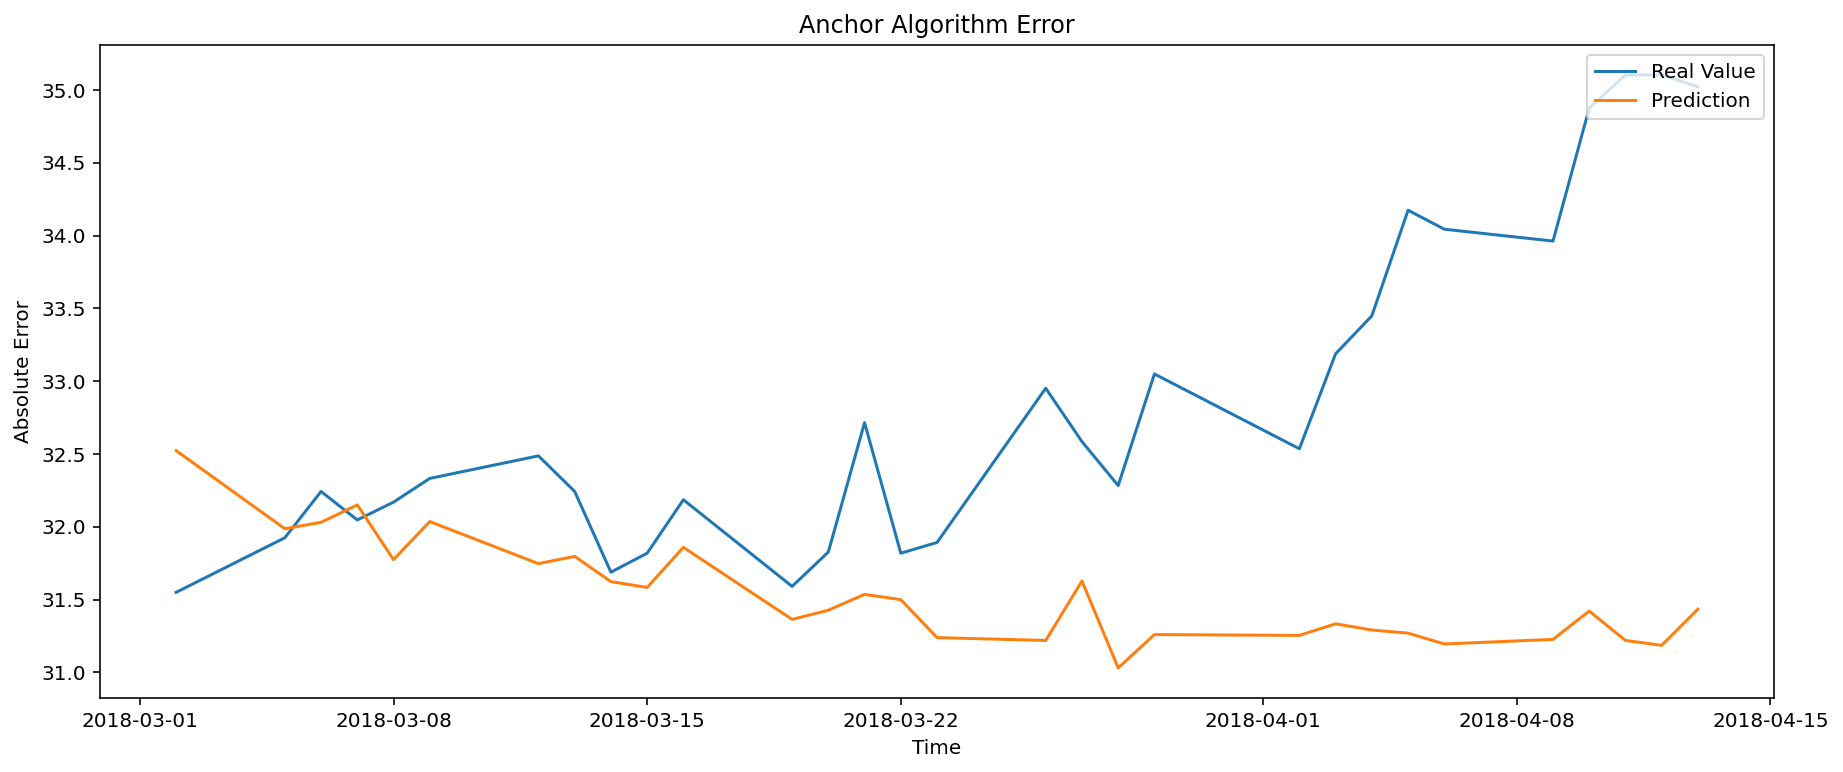

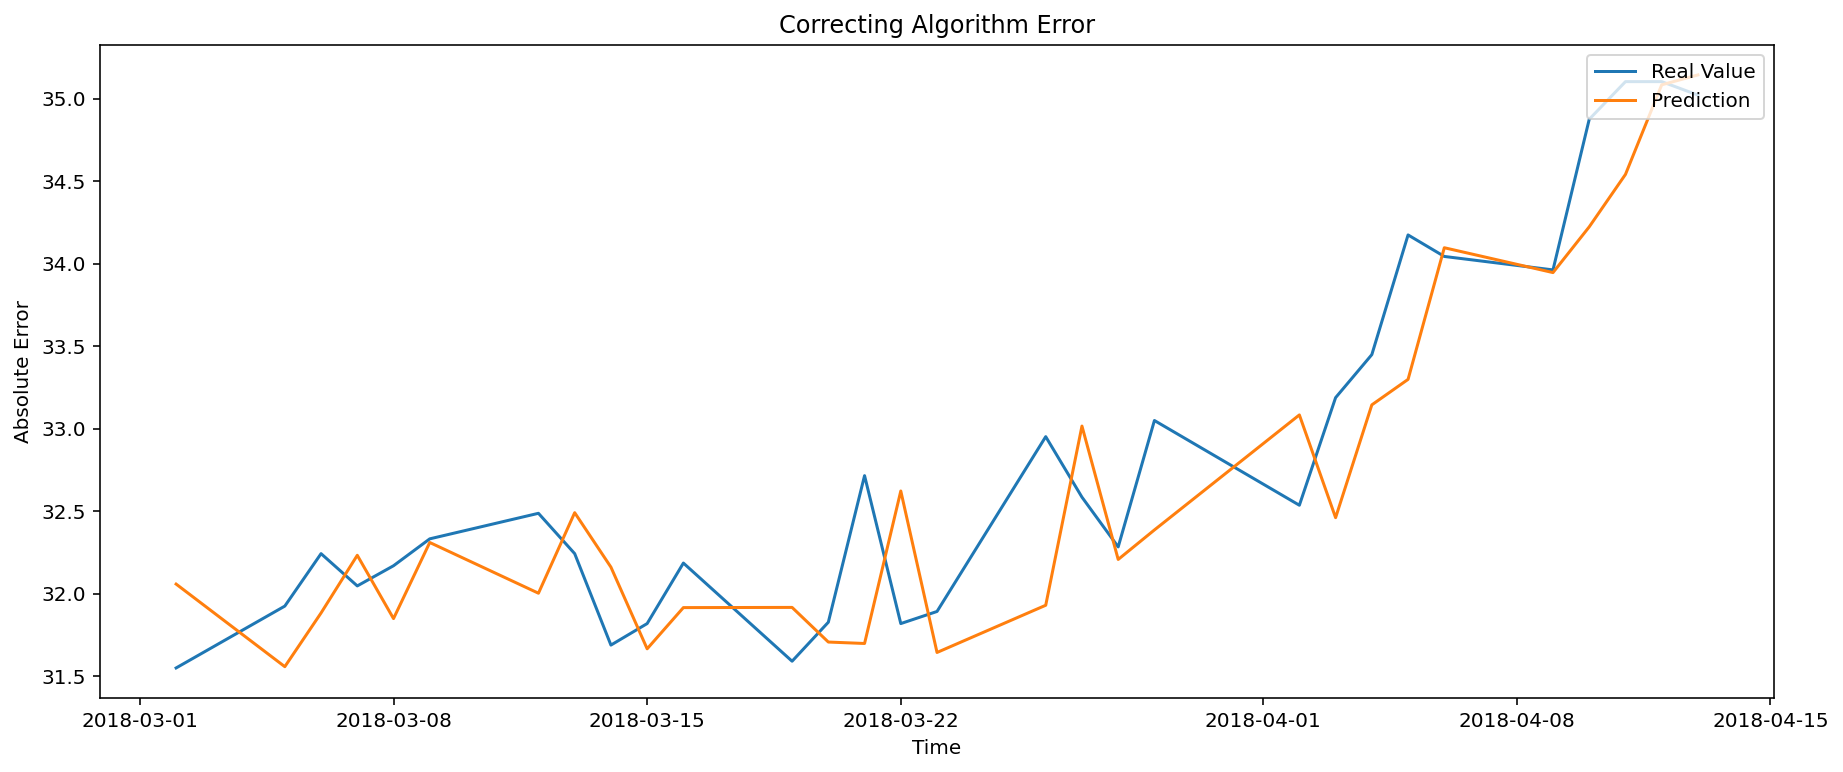

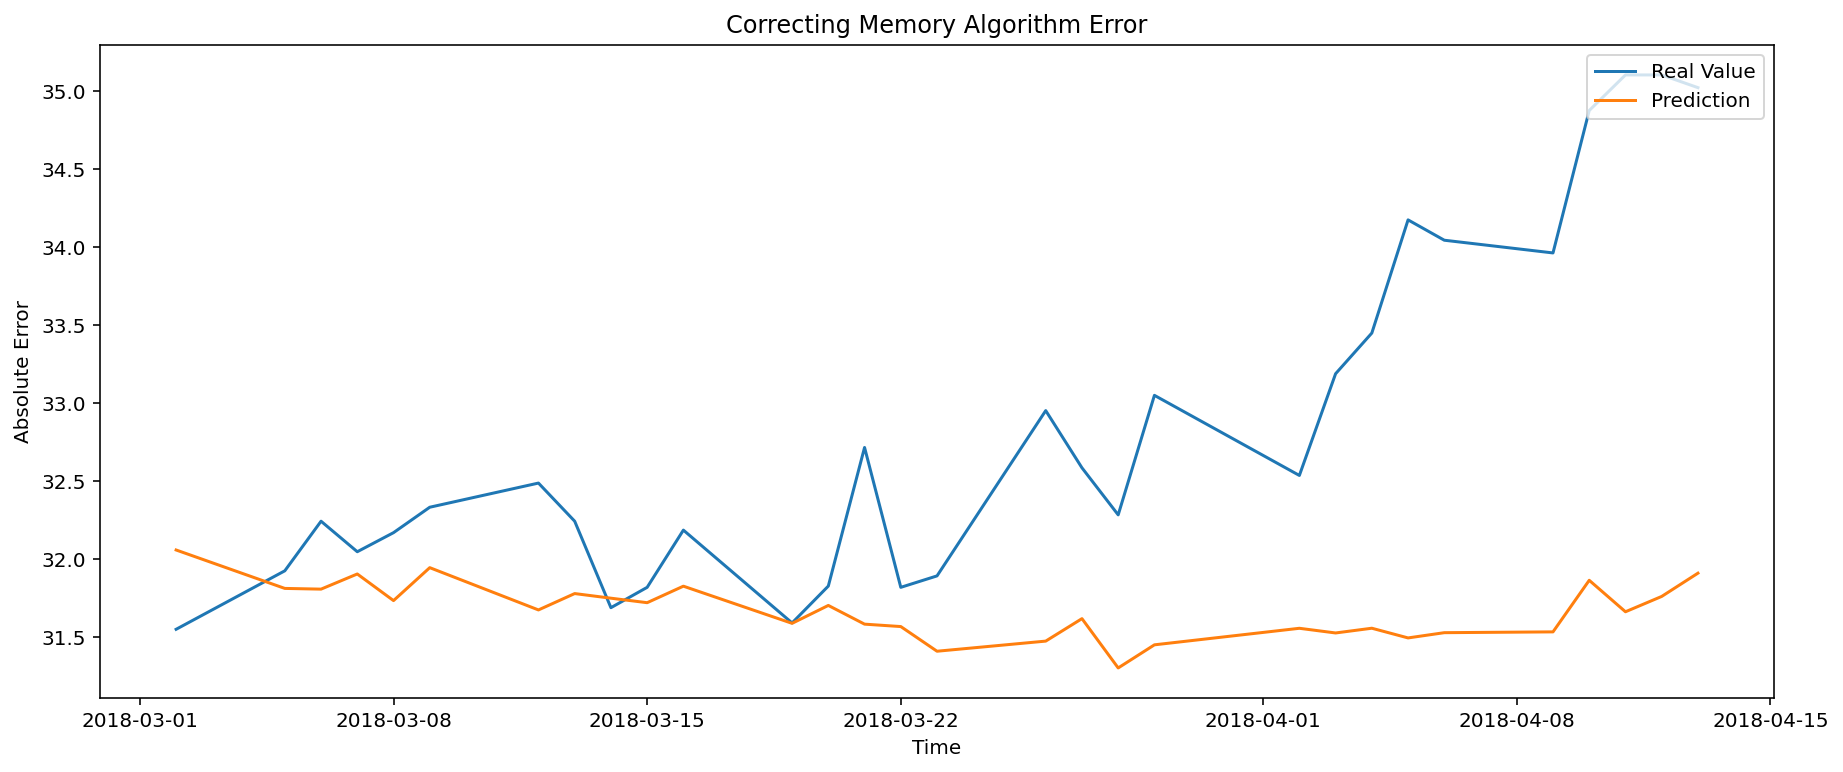

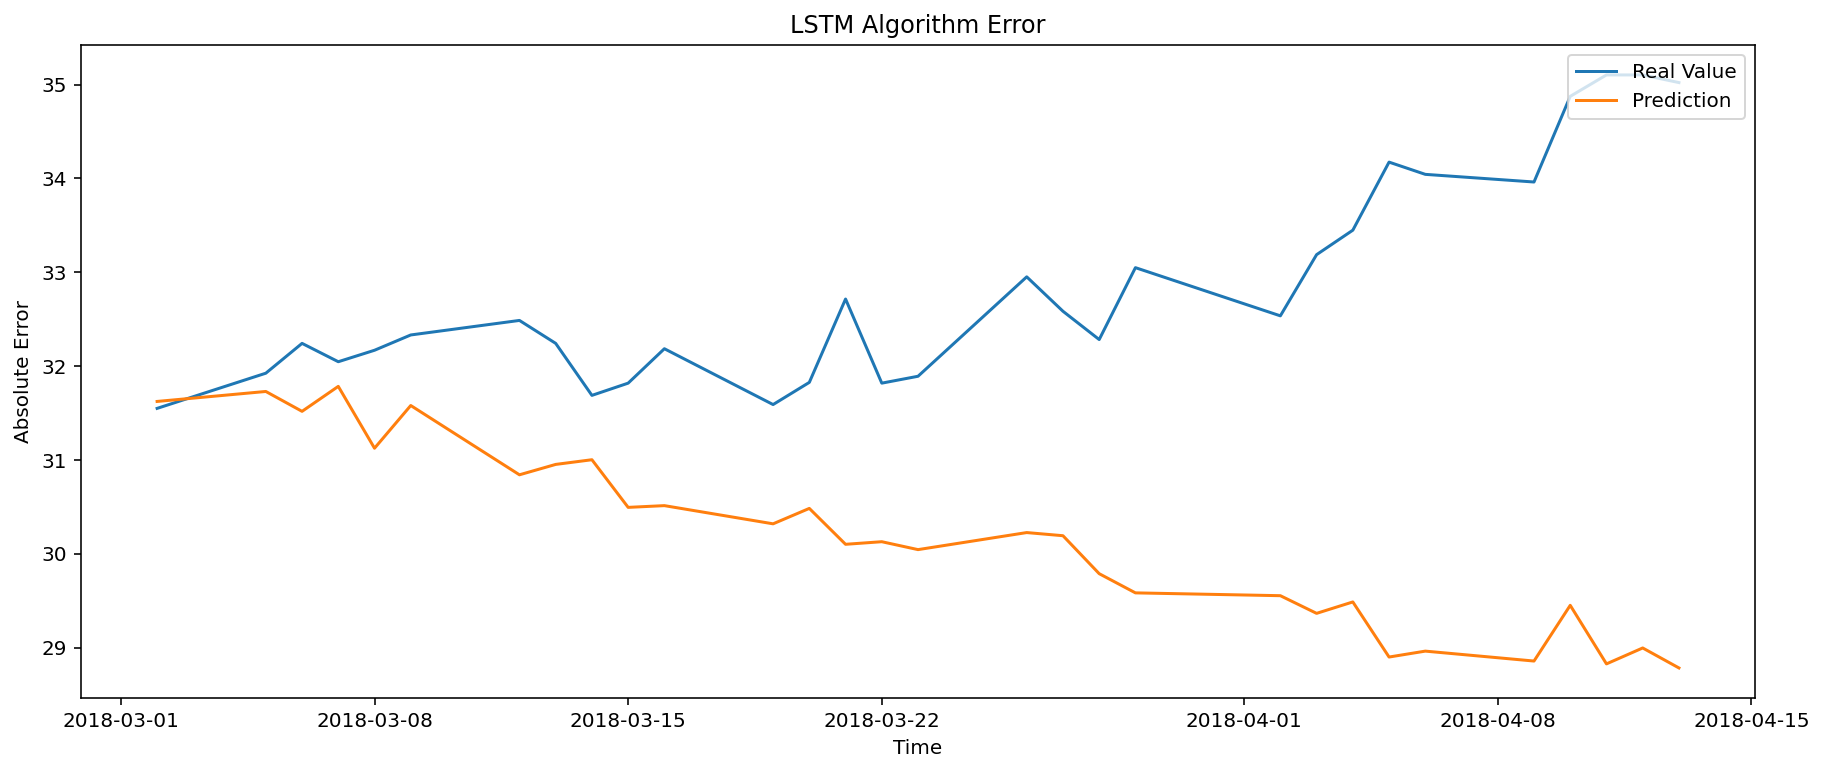

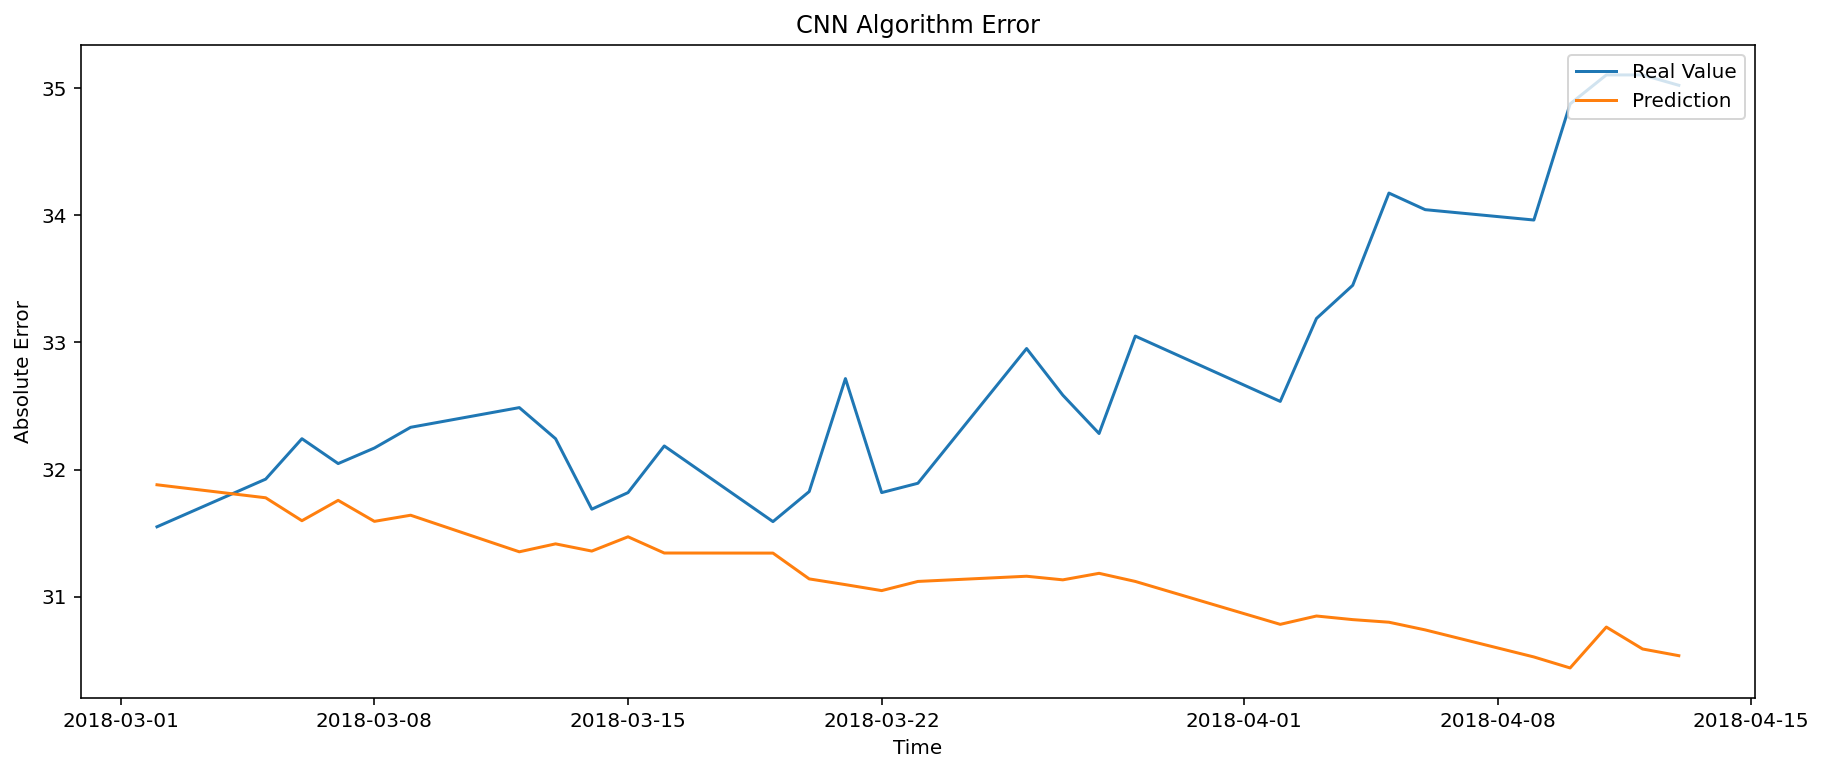

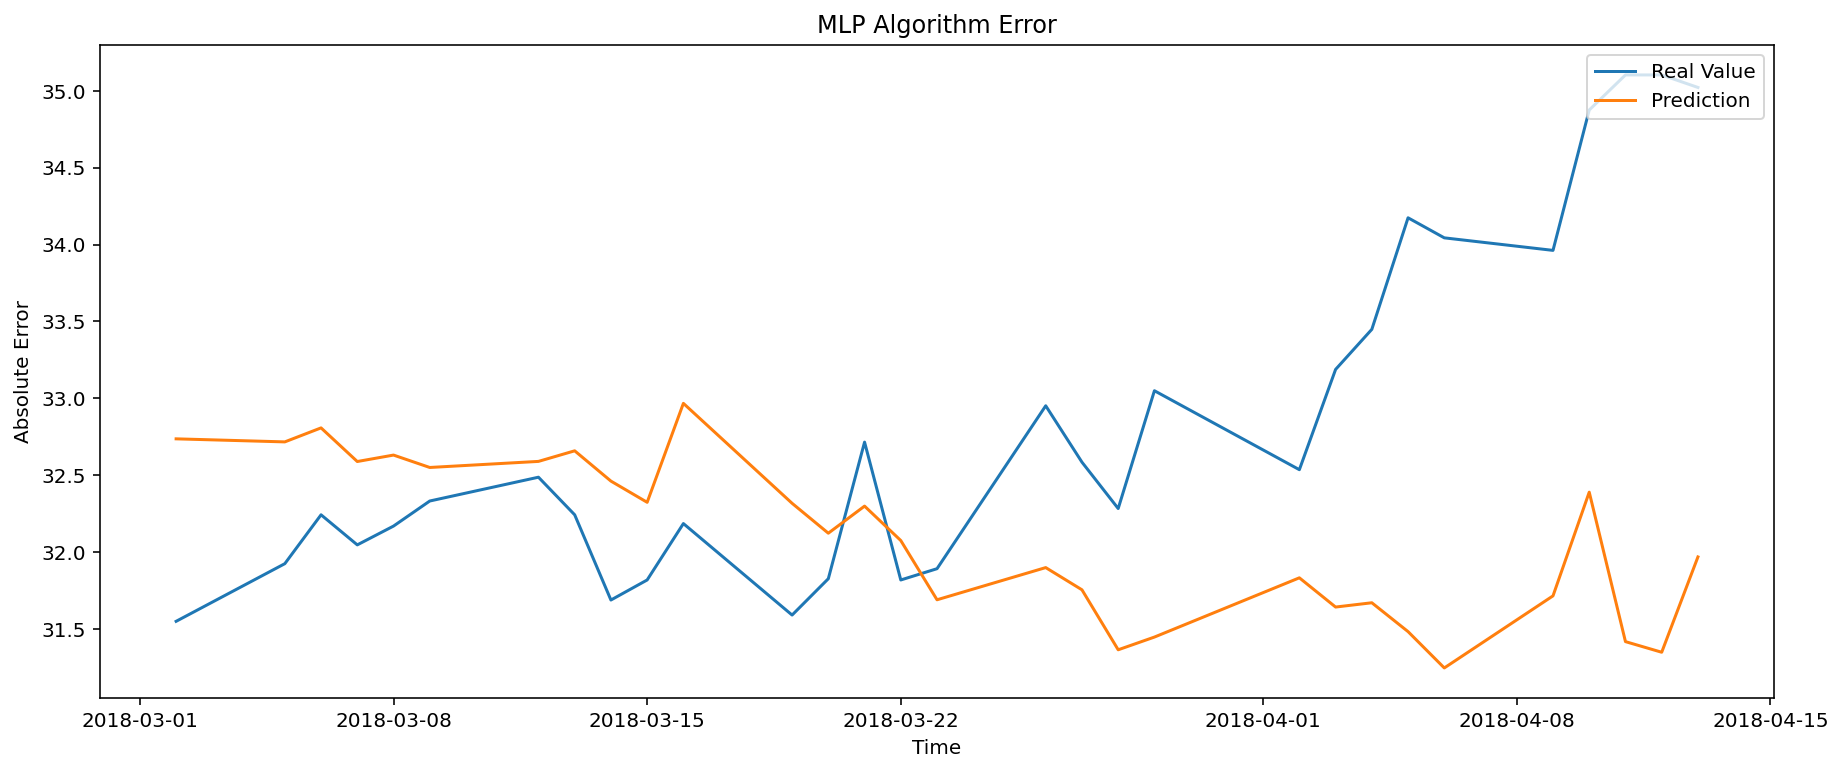

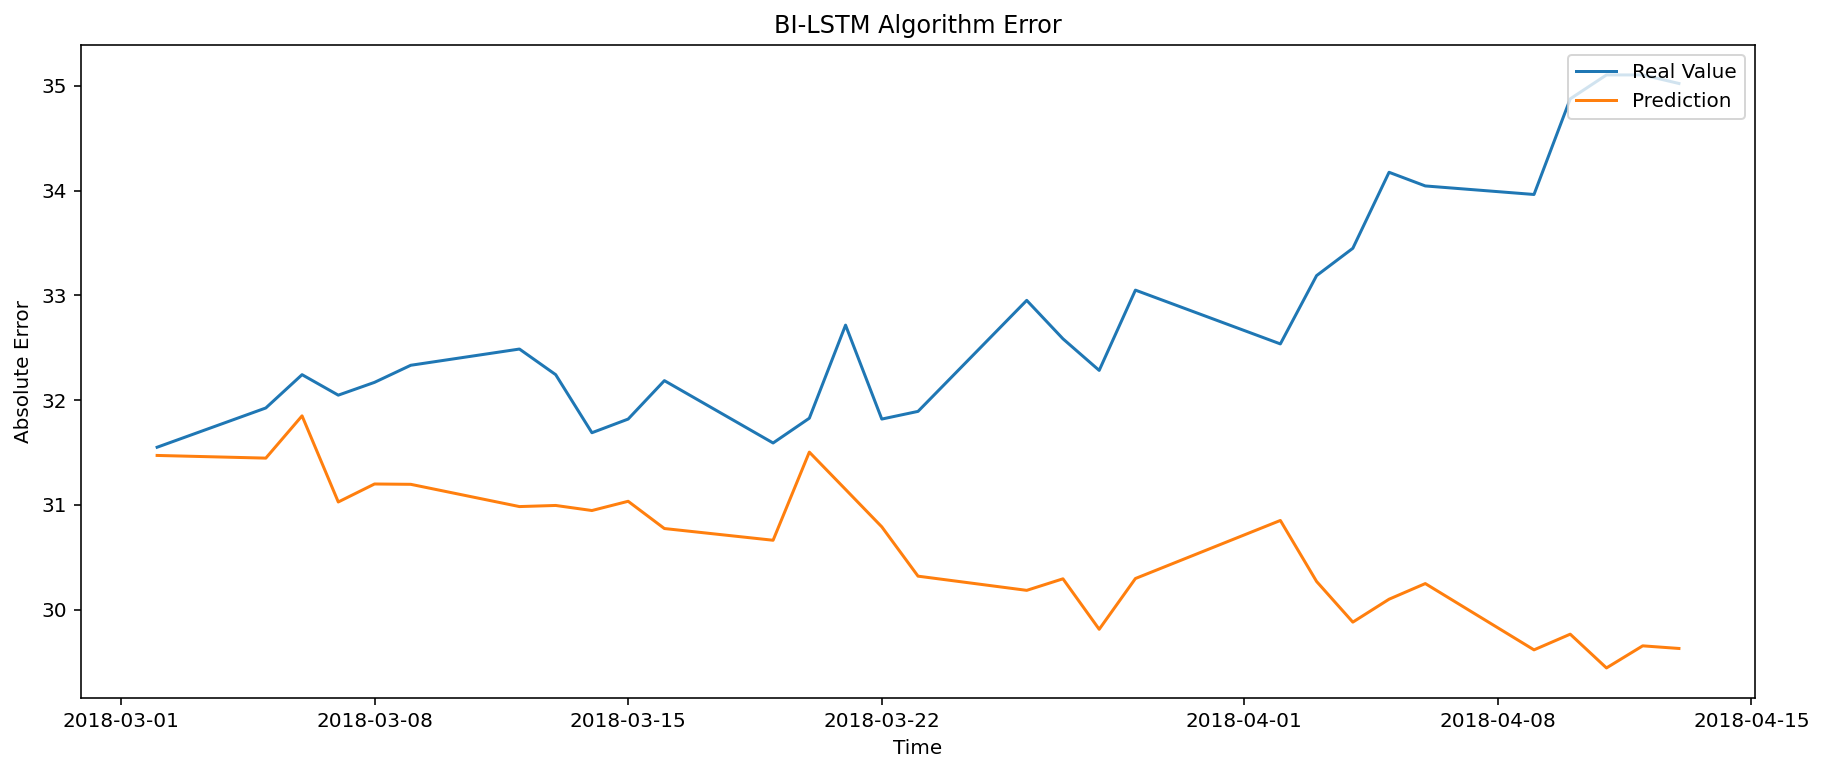

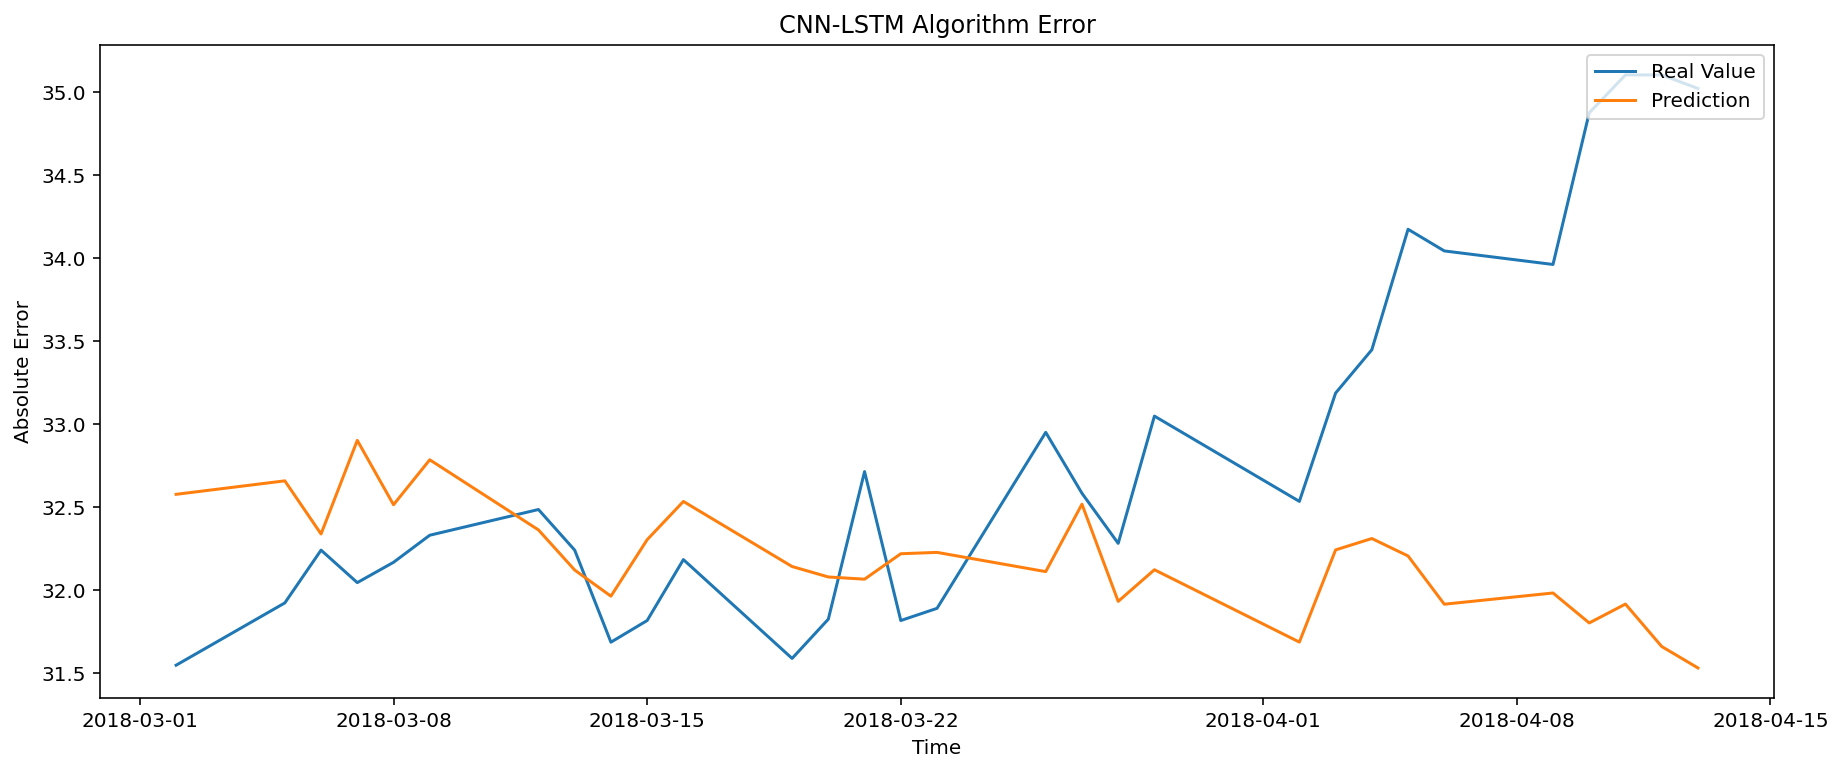

In [13]:
plot_performance(all_forecasts)